## Import modules

In [2]:
import pandas as pd # for data handling
from sklearn.model_selection import cross_val_score # for cross-validation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # evaluation metrics
from sklearn import set_config # enable configure
set_config(print_changed_only=False) # configure print to show all not just changed values
import matplotlib.pyplot as plt # for plotting
import numpy as np

# scikit-learn classifiers evaluated (change as desired)
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [3]:
# Read data from CSV files into pandas dataframes
train = pd.read_csv('hw2.q1.train.csv') # training data
test = pd.read_csv('hw2.q1.test.csv') # test data
new = pd.read_csv('hw2.q1.new.csv') # unlabeled data
# Show number of rows and columns in each dataframe
print('train contains %d rows and %d columns' %train.shape)
print('test contains %d rows and %d columns' %test.shape)
print('new contains %d rows and %d columns' %new.shape)
print('First 3 rows in train:') 
train.head(3) # display first 3 training samples 

train contains 10000 rows and 26 columns
test contains 2000 rows and 26 columns
new contains 30 rows and 26 columns
First 3 rows in train:


,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_16,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25
0,1.0,0.523,0.303,0.898,0.505,0.264,0.441,0.794,0.868,0.744,...,0.136,0.187,0.452,0.459,0.656,0.126,0.245,0.973,0.917,0.740
1,0.0,0.546,0.782,0.323,0.495,0.970,0.127,0.167,0.359,0.065,...,0.616,0.734,0.935,0.782,0.218,0.223,0.931,0.205,0.487,0.065
2,0.0,0.441,0.260,0.824,0.715,0.071,0.004,0.819,0.063,0.343,...,0.209,0.174,0.542,0.970,0.171,0.459,0.316,0.949,0.871,0.720


### Specify inputs and outputs
- **features**: List of the 16 input feature names
- **X_train**: $4000 \times 16$ array containing input values for training samples.
- **y_train**: Array containing labels for the 4000 training samples.
- **X_test**: $1000 \times 16$ array containing input values for test samples.
- **y_test**: Array containing labels for the 1000 training samples.
- **X_new**: $30 \times 16$ array containing input values for unlabeled samples.






In [4]:
features = list(train)[1:] # all but the first column header are feature names
print("features:", features)
X_train, X_test, X_new = train[features], test[features], new[features]
y_train, y_test = train.y, test.y
print('Shapes:')
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, X_new: {X_new.shape}')
print(f'y_train: {y_train.shape}, y_test: {y_test.shape}')

features: ['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25']
Shapes:
X_train: (10000, 25), X_test: (2000, 25), X_new: (30, 25)
y_train: (10000,), y_test: (2000,)


## QUESTION 1

## Evaluate models using *k*-fold cross-validation
We shall use **4**-fold cross-validation so that 3000 of the 4000 training samples are used for training and the remaining 1000 samples are used for validation in each fold. The mean cross-validation accuracy for each model with chosen hyper-parameters on the 4 runs will be computed using the command:
- **score = cross_val_score(model, X_train, y_train, cv=4).mean()**
> - *model*: classifier object with specified hyperparameters
> - *X_train*, *y_train*: Inputs and output labels for training
> - *cv*: number of folds in cross-validation
> - *mean*(): computes mean accuracy from the *cv* runs 

You can look up the documentation for each classifier, change hyper-parameter values, and observe the results. We shall also observe the time it takes to train and evaluate each model 4 times in this *4*-fold cross-validation process.


**Task 1**

In [5]:
for k in range(2,15): # number of rules
    model = DecisionTreeClassifier(max_leaf_nodes=k)
    score = cross_val_score(model, X_train, y_train, cv=5).mean() # mean cross-validation accuracy
    print(f'Mean cross-validation accuracy with {k} rules = {score:0.4f}')

Mean cross-validation accuracy with 2 rules = 0.7178
Mean cross-validation accuracy with 3 rules = 0.8636
Mean cross-validation accuracy with 4 rules = 0.9695
Mean cross-validation accuracy with 5 rules = 0.9695
Mean cross-validation accuracy with 6 rules = 0.9695
Mean cross-validation accuracy with 7 rules = 0.9691
Mean cross-validation accuracy with 8 rules = 0.9690
Mean cross-validation accuracy with 9 rules = 0.9688
Mean cross-validation accuracy with 10 rules = 0.9687
Mean cross-validation accuracy with 11 rules = 0.9689
Mean cross-validation accuracy with 12 rules = 0.9687
Mean cross-validation accuracy with 13 rules = 0.9688
Mean cross-validation accuracy with 14 rules = 0.9686


For this classification problem, cross-validation accuracy increases as the number of rules increase up to 5, and then it starts decreasing. So we shall choose the following model:
- DecisionTreeClassifier(max_leaf_nodes=5)  

In [6]:
chosen_model = DecisionTreeClassifier(max_leaf_nodes=4) # chosen model
print(chosen_model) # display model parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=None,
                       splitter='best')


## Train and test selected model

**Task 2**

In [7]:
%%time
chosen_model.fit(X_train, y_train) # train selected model on ALL training examples
predicted = chosen_model.predict(X_test) # predicted diagnosis for test examples
acc = accuracy_score(y_test, predicted) # accuracy on test samples
print(f'Accuracy on test samples = {acc:0.4f}') # show test accuracy
print("Classification report on test samples:") # for precision, recall, F1-score
print(classification_report(y_test, predicted, digits=4)) # rounded to 4 decimal places

Accuracy on test samples = 0.9710
Classification report on test samples:
              precision    recall  f1-score   support

         0.0     0.9679    0.9771    0.9725      1048
         1.0     0.9745    0.9643    0.9694       952

    accuracy                         0.9710      2000
   macro avg     0.9712    0.9707    0.9709      2000
weighted avg     0.9710    0.9710    0.9710      2000

Wall time: 56 ms


**Task 2**

In [8]:
confusion_matrix(y_test, predicted)

array([[1024,   24],
       [  34,  918]], dtype=int64)

## Predict class for unlabeled samples
We shall use our trained model to predict the output class for the unlabeled samples.

**Task 3**

In [9]:
predicted_new = chosen_model.predict(X_new) # predicted classes for unlabeled samples
new_prediction = pd.DataFrame() # dataframe with predicted classes
new_prediction['ID'] = new.ID # identifiers for unlabeled samples
new_prediction['y'] = predicted_new # # predicted classes for unlabeled samples
new_prediction.to_csv('hw2.prediction.csv', index=False) # save as CSV file
new_prediction # display results

,ID,y
0,ID_001,0.0
1,ID_002,0.0
2,ID_003,0.0
3,ID_004,0.0
4,ID_005,0.0
5,ID_006,0.0
6,ID_007,0.0
7,ID_008,0.0
8,ID_009,0.0
9,ID_010,0.0


## Extract rules from Decision Tree
We shall visualize the decision tree using the *plot_tree* function
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html 

**Task 2**

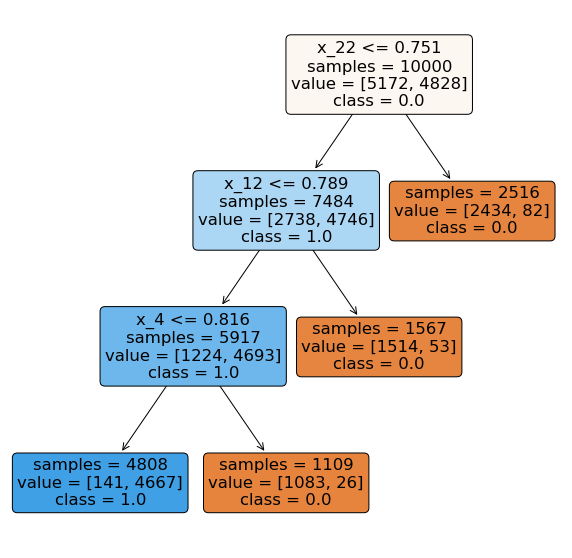

In [12]:
plt.figure(figsize=(10, 10)) # size of figure to be displayed

plot_tree(chosen_model, 
          feature_names=features, 
          class_names=[f'{c}' for c in chosen_model.classes_], 
          filled=True, rounded=True, impurity=False) # plot tree

plt.savefig("decision_tree.png") # save as PNG file
plt.show() # show tree

(THIS IS AN EXAMPLE!)The Decision Tree encodes the following rules:

1. IF *test_7* $>$ 0.764 THEN *diagnosis* = 0.
2. IF *test_7* $\le$ 0.764 AND *test_13* $>$ 0.794 THEN *diagnosis* = 0.
3. IF *test_7* $\le$ 0.764 AND *test_13* $\le$ 0.794 AND *test_3* $>$ 0.806  THEN *diagnosis* = 0.
4. IF *test_7* $\le$ 0.764 AND *test_13* $\le$ 0.794 AND *test_3* $\le$ 0.806 AND *test_12* $>$ 0.816  THEN *diagnosis* = 0.
5. IF *test_7* $\le$ 0.764 AND *test_13* $\le$ 0.794 AND *test_3* $\le$ 0.806 AND *test_12* $\le$ 0.816  THEN *diagnosis* = 0.   

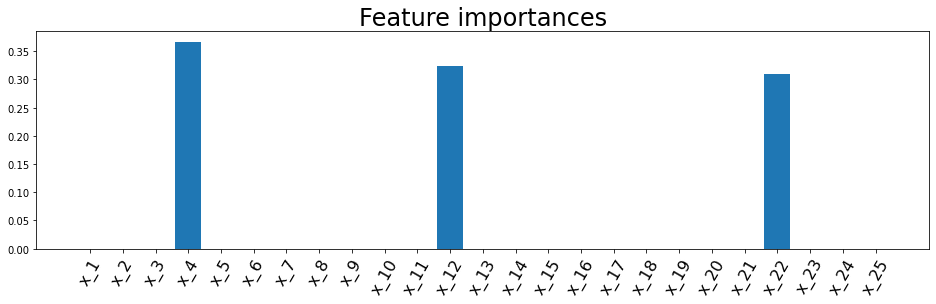

In [11]:
plt.figure(figsize=(16, 4)) # size of figure to be displayed
plt.bar(features, chosen_model.feature_importances_)
plt.xticks(rotation = 60, fontsize=16)
plt.title('Feature importances', fontsize=24)
plt.show()